<a href="https://colab.research.google.com/github/ucheokechukwu/ml_tensorflow_deeplearning/blob/main/01_neural_network_regression_standardization_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in this to numbers between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=47)


# Fit the column transformer to our training data
# Notice that this is done after the split to preserve integrity of the split

ct.fit(X_train)

# Transform the training and test data with normalization and one hot encoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.84782609, 0.48560667, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

<Axes: ylabel='Frequency'>

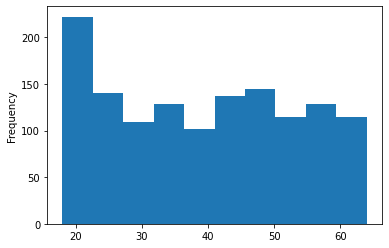

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

**Note** how the number of columns for the normalized X_train is greater than the original X_train.
Now we can build a neural network model on this and see how it goes.

In [ ]:
## Building the Neural Network Model

In [ ]:
# 1. Create the model
# 2. Compile the model
# 3. Model summary
# 4. Fit the model

In [47]:
model = tf.keras.models.load_model("/content/drive/MyDrive/ML_Tensor/insurance_model.h5")

In [44]:
def prediction_function (model, 
                         X_test=X_test,
                         y_true=y_test):
  
  """Function for evaluating the model. 
  Prints the data and reports the MAE & MSE.
  Return the predicted labels.
  """
  y_pred = model.predict(X_test)
  plt.scatter(y_test, y_test, c="g", label="Groundtruth")
  plt.scatter(y_test, y_pred, c="r", label="Predictions")
  plt.legend();
  mae_ = mae(y_true, y_pred).numpy()
  mse_ = mse(y_true, y_pred).numpy()
  print(f"The MAE is: {mae_}")
  print(f"The MSE is: {mse_}")
  return (y_pred, mae_, mse_)



def mae(y_true, y_preds):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(tf.constant(y_preds)))

def mse(y_true, y_preds):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(tf.constant(y_preds)))

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               1200      
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(X_train_normal, y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 0s 2ms/step - loss: 15958.4863 - mae: 15958.4863
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 15082.4336 - mae: 15082.4336
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: 14343.1123 - mae: 14343.1123
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 13725.9980 - mae: 13725.9980
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 13175.7324 - mae: 13175.7324
Epoch 6/150
34/34 [==============================] - 0s 2ms/step - loss: 12658.5371 - mae: 12658.5371
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 12148.9336 - mae: 12148.9336
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 11626.8193 - mae: 11626.8193
Epoch 9/150
34/34 [==============================] - 0s 2ms/step - loss: 11089.5771 - mae: 11089.5771
Epoch 10/150
34/34 [==============================] - 0s 2ms/step - loss: 10513.08

Text(0.5, 0, 'epochs')

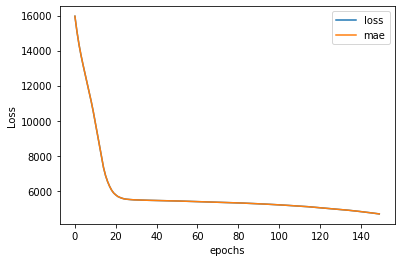

In [50]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

9/9 [==============================] - 0s 3ms/step
The MAE is: 4199.7138671875
The MSE is: 42688148.0


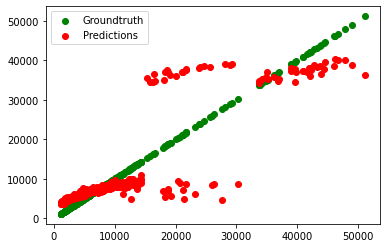

In [51]:
y=prediction_function(model, X_test=X_test_normal, y_true=y_test)

Compared to the previous result:
* The MAE is: 3179.02685546875

* The MSE is: 44716732.0